In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import os

# Set Up Data Paths
train_dir = '/Users/tharun/Downloads/PROJECTS/New/NEW INVENTORY/ML Main/Lung Disease Dataset/train'
val_dir = '/Users/tharun/Downloads/PROJECTS/New/NEW INVENTORY/ML Main/Lung Disease Dataset/val'
test_dir = '/Users/tharun/Downloads/PROJECTS/New/NEW INVENTORY/ML Main/Lung Disease Dataset/test'

# Data Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Build the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # 5 classes: Bacterial Pneumonia, Corona Virus Disease, Normal, Tuberculosis, Viral Pneumonia
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the Model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=[early_stopping]
)

# Evaluate the Model
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

# Save the Model
model.save('/Users/tharun/Downloads/PROJECTS/New/NEW INVENTORY/ML Main/File/lung_disease_model.keras')


Found 6054 images belonging to 5 classes.
Found 2016 images belonging to 5 classes.
Found 2025 images belonging to 5 classes.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


190/190 ━━━━━━━━━━━━━━━━━━━━ 84s 431ms/step - accuracy: 0.3471 - loss: 1.4326 - val_accuracy: 0.6205 - val_loss: 0.9296
Epoch 2/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 96s 497ms/step - accuracy: 0.5648 - loss: 1.0386 - val_accuracy: 0.6677 - val_loss: 0.8636
Epoch 3/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 97s 501ms/step - accuracy: 0.6445 - loss: 0.8664 - val_accuracy: 0.7024 - val_loss: 0.7180
Epoch 4/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 99s 512ms/step - accuracy: 0.6815 - loss: 0.7689 - val_accuracy: 0.7024 - val_loss: 0.7286
Epoch 5/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 101s 524ms/step - accuracy: 0.6988 - loss: 0.7426 - val_accuracy: 0.7545 - val_loss: 0.6322
Epoch 6/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 99s 515ms/step - accuracy: 0.7100 - loss: 0.7230 - val_accuracy: 0.7346 - val_loss: 0.6492
Epoch 7/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 104s 539ms/step - accuracy: 0.7098 - loss: 0.7023 - val_accuracy: 0.7654 - val_loss: 0.5637
Epoch 8/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 110s 565ms/step - accuracy: 0.7482 - loss: 0.6214 - 

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the saved model
model = tf.keras.models.load_model('/Users/tharun/Downloads/PROJECTS/New/NEW INVENTORY/ML Main/File/lung_disease_model.keras')

# Set Up Data Paths
test_dir = '/Users/tharun/Downloads/PROJECTS/New/NEW INVENTORY/ML Main/Lung Disease Dataset/test'

# Data Preprocessing for Test Data
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important to not shuffle if you want to match predictions with true labels
)

# Evaluate the Model on Test Data
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')


Found 2025 images belonging to 5 classes.
 2/64 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.4062 - loss: 1.1211  

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 192ms/step - accuracy: 0.7547 - loss: 0.5303
Test accuracy: 0.8345679044723511


64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 189ms/step


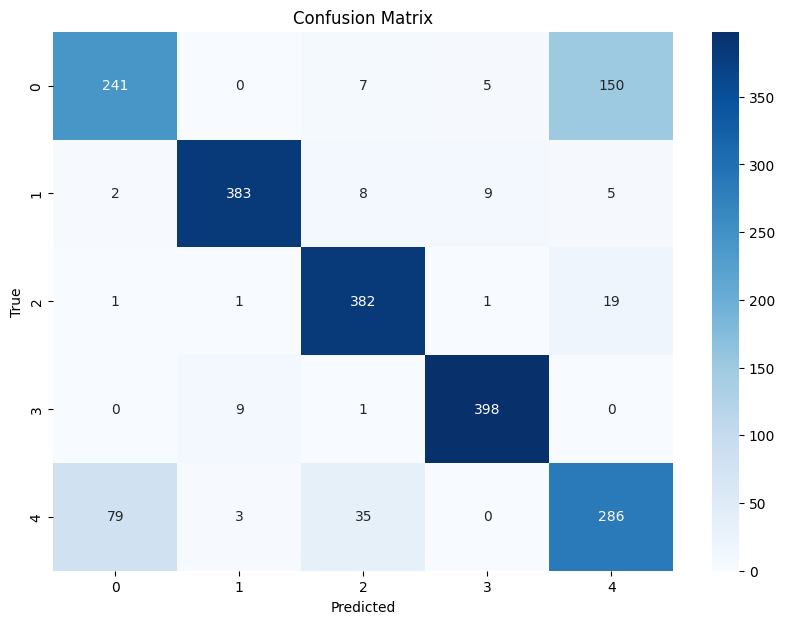

Classification Report:
                      precision    recall  f1-score   support

 Bacterial Pneumonia       0.75      0.60      0.66       403
Corona Virus Disease       0.97      0.94      0.95       407
              Normal       0.88      0.95      0.91       404
        Tuberculosis       0.96      0.98      0.97       408
     Viral Pneumonia       0.62      0.71      0.66       403

            accuracy                           0.83      2025
           macro avg       0.84      0.83      0.83      2025
        weighted avg       0.84      0.83      0.83      2025



In [3]:
# Get predictions from the model
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
class_labels = list(test_generator.class_indices.keys())  # Get class labels
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))


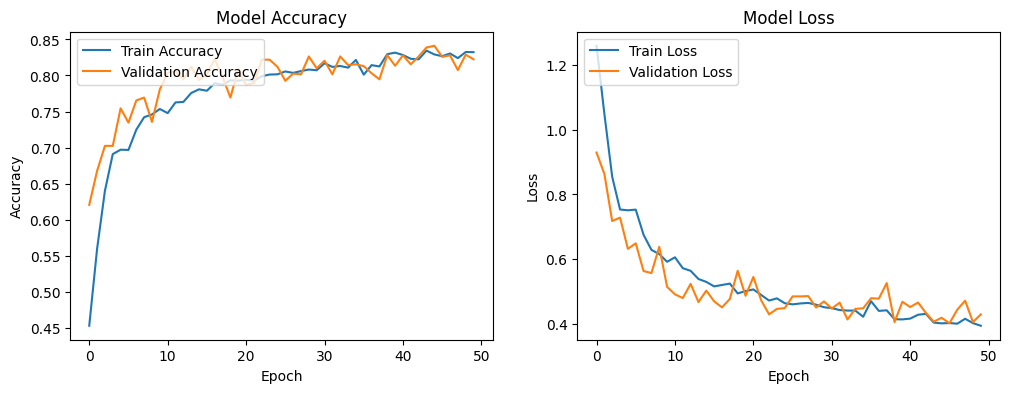

In [4]:
# Assuming 'history' is the variable that stores the history object returned by model.fit()

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()


In [6]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the trained model
model = tf.keras.models.load_model('/Users/tharun/Downloads/PROJECTS/New/NEW INVENTORY/ML Main/File/lung_disease_model.keras')

# Load and preprocess a single image
img_path = '/Users/tharun/Downloads/PROJECTS/New/NEW INVENTORY/ML Main/Lung Disease Dataset/train/Normal/test_0_9379.jpeg'  # Replace with your image path
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension
img_array = img_array / 255.0  # Rescale the image like your training data

# Predict the class
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])  # Get the index of the highest probability
class_labels = list(test_generator.class_indices.keys())  # Get class labels
predicted_label = class_labels[predicted_class]

print(f'The predicted class is: {predicted_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
The predicted class is: Normal


Found 6054 images belonging to 5 classes.
  1/190 ━━━━━━━━━━━━━━━━━━━━ 30s 159ms/step

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


190/190 ━━━━━━━━━━━━━━━━━━━━ 37s 194ms/step
Overall Accuracy: 0.8563
Class: Bacterial Pneumonia
  Precision: 0.7740
  Recall:    0.6224
  F1-Score:  0.6900

Class: Corona Virus Disease
  Precision: 0.9774
  Recall:    0.9606
  F1-Score:  0.9689

Class: Normal
  Precision: 0.9180
  Recall:    0.9370
  F1-Score:  0.9274

Class: Tuberculosis
  Precision: 0.9803
  Recall:    0.9795
  F1-Score:  0.9799

Class: Viral Pneumonia
  Precision: 0.6527
  Recall:    0.7791
  F1-Score:  0.7103


Classification Report:
                      precision    recall  f1-score   support

 Bacterial Pneumonia       0.77      0.62      0.69      1205
Corona Virus Disease       0.98      0.96      0.97      1218
              Normal       0.92      0.94      0.93      1207
        Tuberculosis       0.98      0.98      0.98      1220
     Viral Pneumonia       0.65      0.78      0.71      1204

            accuracy                           0.86      6054
           macro avg       0.86      0.86      0.86   

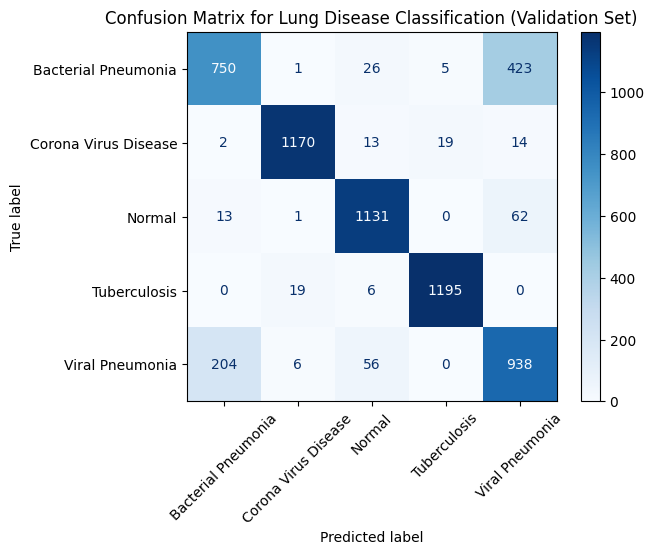

In [7]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to the validation data
val_dir = '/Users/tharun/Downloads/PROJECTS/New/NEW INVENTORY/ML Main/Lung Disease Dataset/train'

# Load the trained model
model = load_model('/Users/tharun/Downloads/PROJECTS/New/NEW INVENTORY/ML Main/File/lung_disease_model.keras')

# Data Preprocessing for validation set
val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Make sure to disable shuffle for validation and testing
)

# Predict on the validation set
predictions = model.predict(val_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

# Get the true classes from the validation set
true_classes = val_generator.classes
class_labels = list(val_generator.class_indices.keys())  # Get class labels (disease names)

# Calculate overall accuracy
accuracy = accuracy_score(true_classes, predicted_classes)
print(f'Overall Accuracy: {accuracy:.4f}')

# Calculate precision, recall, and F1-score for each class
precision = precision_score(true_classes, predicted_classes, average=None, zero_division=1)
recall = recall_score(true_classes, predicted_classes, average=None, zero_division=1)
f1 = f1_score(true_classes, predicted_classes, average=None, zero_division=1)

# Print precision, recall, and F1-score for each class
for idx, label in enumerate(class_labels):
    print(f'Class: {label}')
    print(f'  Precision: {precision[idx]:.4f}')
    print(f'  Recall:    {recall[idx]:.4f}')
    print(f'  F1-Score:  {f1[idx]:.4f}')
    print()

# Print overall classification report (includes precision, recall, F1-score, and support)
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels, zero_division=1))

# Optional: Compute and display confusion matrix again (if needed)
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(true_classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title('Confusion Matrix for Lung Disease Classification (Validation Set)')
plt.show()


Found 2016 images belonging to 5 classes.
 1/63 ━━━━━━━━━━━━━━━━━━━━ 8s 145ms/step

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 177ms/step
Overall Accuracy: 0.8294
Class: Bacterial Pneumonia
  Precision: 0.6943
  Recall:    0.7531
  F1-Score:  0.7225

Class: Corona Virus Disease
  Precision: 0.9340
  Recall:    0.9409
  F1-Score:  0.9374

Class: Normal
  Precision: 0.8656
  Recall:    0.9453
  F1-Score:  0.9037

Class: Tuberculosis
  Precision: 0.9483
  Recall:    0.9483
  F1-Score:  0.9483

Class: Viral Pneumonia
  Precision: 0.6820
  Recall:    0.5561
  F1-Score:  0.6126


Classification Report:
                      precision    recall  f1-score   support

 Bacterial Pneumonia       0.69      0.75      0.72       401
Corona Virus Disease       0.93      0.94      0.94       406
              Normal       0.87      0.95      0.90       402
        Tuberculosis       0.95      0.95      0.95       406
     Viral Pneumonia       0.68      0.56      0.61       401

            accuracy                           0.83      2016
           macro avg       0.82      0.83      0.82     

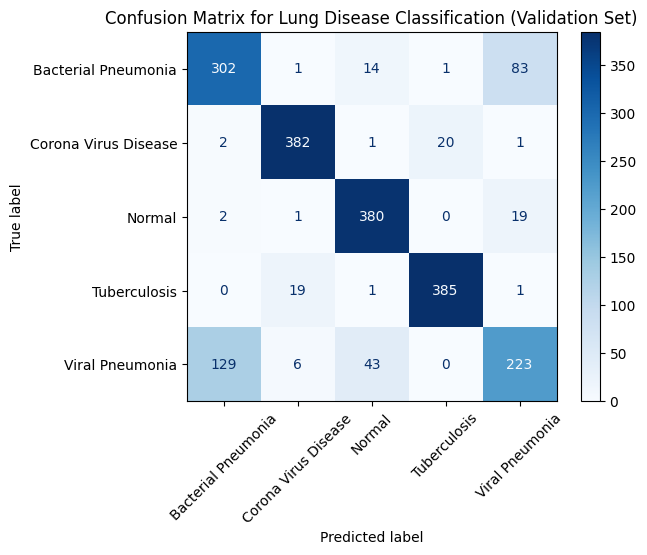

In [4]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to the validation data
val_dir = '/Users/tharun/Downloads/PROJECTS/New/NEW INVENTORY/ML Main/Lung Disease Dataset/val'

# Load the trained model
model = load_model('/Users/tharun/Downloads/PROJECTS/New/NEW INVENTORY/ML Main/File/lung_disease_model.keras')

# Data Preprocessing for validation set
val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Make sure to disable shuffle for validation and testing
)

# Predict on the validation set
predictions = model.predict(val_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

# Get the true classes from the validation set
true_classes = val_generator.classes
class_labels = list(val_generator.class_indices.keys())  # Get class labels (disease names)

# Calculate overall accuracy
accuracy = accuracy_score(true_classes, predicted_classes)
print(f'Overall Accuracy: {accuracy:.4f}')

# Calculate precision, recall, and F1-score for each class
precision = precision_score(true_classes, predicted_classes, average=None, zero_division=1)
recall = recall_score(true_classes, predicted_classes, average=None, zero_division=1)
f1 = f1_score(true_classes, predicted_classes, average=None, zero_division=1)

# Print precision, recall, and F1-score for each class
for idx, label in enumerate(class_labels):
    print(f'Class: {label}')
    print(f'  Precision: {precision[idx]:.4f}')
    print(f'  Recall:    {recall[idx]:.4f}')
    print(f'  F1-Score:  {f1[idx]:.4f}')
    print()

# Print overall classification report (includes precision, recall, F1-score, and support)
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels, zero_division=1))

# Optional: Compute and display confusion matrix again (if needed)
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(true_classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title('Confusion Matrix for Lung Disease Classification (Validation Set)')
plt.show()
